An implementation of simple linear regression from scratch, reference taken from: https://machinelearningmastery.com/implement-simple-linear-regression-scratch-python/

The process goes like
1. Calculate required statistics
2. Estimating coefficients
3. Make predictions.

# Functions Required.

In [18]:
def f_mean(values):
  return sum(values)/len(values)

In [19]:
def f_variance(values, mn):
  return sum([(xi-mn)**2 for xi in values])/(len(values)-1)

In [20]:
def f_covariance(values_x, xmean, values_y, ymean):
  covar= 0.0
  for i in range(len(values_x)):
    a_x = ((values_x[i]-xmean)*(values_y[i]-ymean))
    a_x=a_x/(len(values_x)-1)
    covar+= a_x
  return covar 

In [21]:
#testing the functions the answers should be xmean = 20.6, ymean = 15.2 and covariance = 146.1, xvar = 231.29, yvar=105.1
x1 = [5, 12, 18, 23, 45]
y1 = [2, 8, 18, 20, 28]
a_x=f_mean(x1)
a_y=f_mean(y1)
print(" The xmean is :\n",a_x)
print('\n')
print("The ymean is:\n",a_y)
print('\n')
print("The xvariance is:\n",f_variance(x1,a_x))
print("The yvariance is :\n",f_variance(y1,a_y))
print("The covariance is :\n",f_covariance(x1,a_x,y1,a_y))

 The xmean is :
 20.6


The ymean is:
 15.2


The xvariance is:
 231.29999999999998
The yvariance is :
 105.2
The covariance is :
 146.1


Creating a coefficient calculator function

In [22]:
def f_coe(xvalues,xmean,yvalues,ymean):
  xmean = f_mean(xvalues)
  ymean = f_mean(yvalues)
  b1 = ((f_covariance(xvalues,xmean, yvalues, ymean))/f_variance(xvalues,xmean))
  b0 = ymean - b1*xmean
  return b0,b1


Creating the simple linear regression function

In [23]:
def f_slr(x_train,x_test,y_train,y_test):
  xmean = f_mean(x_train)
  ymean = f_mean(y_train)
  b0, b1 = f_coe(x_train,xmean,y_train,ymean)
  predicted=[]
  for each in x_test:
    yhat = b0 + b1*each
    predicted.append(yhat)
  return predicted



Using the root mean squared error to calculate the accuracy

In [24]:
def f_rmse(predicted, actual):
  sse = 0.0
  for i in range(len(actual)):
    err = (predicted[i])-(actual[i])
    sse+=err**2
  mean_error = sse/float(len(actual))
  return sqrt(mean_error)

Determining the pearson's correlation coefficient

# Importing the libraries


In [26]:
import pandas as pd #used for dataframe manipulation
import numpy as np # used for array manipulation
import matplotlib.pyplot as plt # use for visualization
from sklearn.model_selection import train_test_split #using this for splitting the dataset into training and testing sets.
from math import sqrt

# Importing the dataset

In [27]:
data = pd.read_csv('Pokemon.csv')
#here we are using panas to import a csv file.

In [28]:
data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In this case we will only take the columns into conisderation that we require. We are trying to predict the hp of pokemon based on it's type using simple linear regression. We will use the attakc to predict the special attack and see the relation between them

In [29]:
data_to_use = data[['Attack','Sp. Atk']]

In [30]:
data_to_use

,Attack,Sp. Atk
0,49,65
1,62,80
2,82,100
3,100,122
4,52,60
...,...,...
795,100,100
796,160,160
797,110,150
798,160,170


Checking for NA Values

In [31]:
data_to_use.isna().sum()

Attack     0
Sp. Atk    0
dtype: int64

This means we are good to go. Let us check our data using a scatter plot.

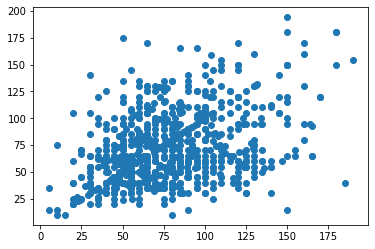

In [32]:
x = data_to_use['Attack']
y = data_to_use['Sp. Atk']
plt.scatter(x, y)

What are all the functions that we will need in this section?
1. A mean calculator
2. A variance calculator
3. A covariance calculator
4. A coefficient calculator
5. A Predictor
6. An error calculator
7. A graph showing the actual and predicted values. 

In [33]:
'''
#checking
dataset=pd.read_csv('salary_data.csv')
x_check = dataset['YearsExperience']
x_check = [int(i) for i in x_check]
y_check = dataset['Salary']
y_check = [int(i) for i in y_check]
'''

"\n#checking\ndataset=pd.read_csv('salary_data.csv')\nx_check = dataset['YearsExperience']\nx_check = [int(i) for i in x_check]\ny_check = dataset['Salary']\ny_check = [int(i) for i in y_check]\n"

In [34]:
#x_train_check,x_test_check,y_train_check,y_test_check = train_test_split(x_check,y_check, test_size=0.2, random_state=6601)

In [35]:
'''
predicted_values= (f_slr(x_train_check,x_test_check,y_train_check,y_test_check))
actual_values = list(y_test_check)
'''

'\npredicted_values= (f_slr(x_train_check,x_test_check,y_train_check,y_test_check))\nactual_values = list(y_test_check)\n'

In [36]:
'''
print(predicted_values)
#print(type(predicted_values[0]),type(actual_values))
'''

'\nprint(predicted_values)\n#print(type(predicted_values[0]),type(actual_values))\n'

In [37]:
'''
print(predicted_values)
rmse = f_rmse(predicted_values,actual_values)
print(rmse)
print(actual_values)
'''

'\nprint(predicted_values)\nrmse = f_rmse(predicted_values,actual_values)\nprint(rmse)\nprint(actual_values)\n'

In [38]:
'''
x_train= [1,2,4,3,5]
x_test = [5]
y_train = [1,3,3,2,5]
y_test = [5]
predicted_values = (f_slr(x_train,x_test,y_train,y_test))
actual_values = y_test

print(predicted_values)
rmse = f_rmse(predicted_values,actual_values)
print(rmse)
print(actual_values)
'''

'\nx_train= [1,2,4,3,5]\nx_test = [5]\ny_train = [1,3,3,2,5]\ny_test = [5]\npredicted_values = (f_slr(x_train,x_test,y_train,y_test))\nactual_values = y_test\n\nprint(predicted_values)\nrmse = f_rmse(predicted_values,actual_values)\nprint(rmse)\nprint(actual_values)\n'

# Implementation on data set

In [39]:
x = data_to_use['Attack'].values
y = data_to_use['Sp. Atk'].values
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=6601)
predictions = f_slr(x_train,x_test,y_train,y_test)
print(predictions)
actual = y_test
rmse = f_rmse(predictions,actual)
print(rmse)
print(actual)

[60.126730093280536, 60.126730093280536, 108.14340239323892, 81.95249022962525, 81.95249022962525, 86.31764225689419, 66.67445813418395, 73.22218617508736, 51.39642603874265, 70.16657975599911, 64.49188212054948, 66.67445813418395, 63.18233651236879, 77.5873382023563, 71.47612536417978, 55.761578066011595, 65.36491252600327, 66.67445813418395, 60.126730093280536, 55.761578066011595, 86.31764225689419, 60.126730093280536, 55.761578066011595, 62.309306106915, 47.03127401147371, 51.39642603874265, 66.67445813418395, 73.22218617508736, 84.57158144598662, 66.67445813418395, 89.37324867598245, 71.03961016145288, 85.00809664871352, 84.13506624325973, 75.40476218872183, 79.33339901326389, 65.80142772873016, 66.67445813418395, 86.31764225689419, 64.49188212054948, 71.03961016145288, 73.22218617508736, 57.94415407964607, 65.80142772873016, 51.39642603874265, 71.91264056690667, 96.79400712233965, 68.85703414781842, 103.77825036596997, 97.23052232506654, 51.39642603874265, 99.41309833870102, 81.95

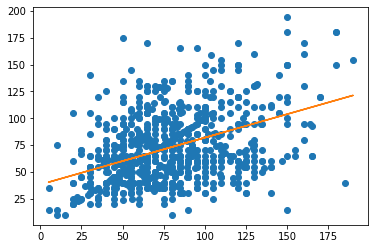

In [40]:
b0,b1 = f_coe(x_train,1,y_train,1)
plt.plot(x,y,'o')
plt.plot(x,b0+b1*x)

In [41]:
final_predictions = pd.DataFrame(list(zip(x_test,y_test,predictions)), columns=['Attack','Actual Special Attack','Prediction'])

In [42]:
final_predictions

,Attack,Actual Special Attack,Prediction
0,50,60,60.126730
1,50,120,60.126730
2,160,130,108.143402
3,100,125,81.952490
4,100,105,81.952490
...,...,...,...
155,53,58,61.436276
156,90,90,77.587338
157,58,81,63.618852
158,36,32,54.015517


In [51]:
from scipy.stats import pearsonr
x = list(x)
y = list(y)
r, _ = pearsonr(x,y)
print("The correlation coefficient is\n",r)

The correlation coefficient is
 0.3963617553492318


# Conclusion

It can be seen that in all pokemons the correlation between attack and special attack is somewhat positively correlated. Meaning the Sp. Attack of a pokemon is likely to increase with it's attack